# Backward error of the LU decomposition

In this section we will present some examples that illuminate the behaviour of the growth factor $\rho$ in the LU decomposition.
We will start off by a worst case example and then present numerical experiments from the literature that indicate in practice the growth factor is rarely relevant. Indeed, in practice the LU decomposition has excellent backward stability properties.

## Worst-Case Instability

In [1]:
import numpy as np

def matrix_with_large_rho(n):
    A = np.zeros((n,n),dtype=np.float64)
    for j in range(n-1):
        A += np.diag(-np.ones(n-1-j,dtype=np.float64),-j-1)
    A +=np.diag(np.ones(n,dtype=np.float64))
    A[:,-1]=np.ones(n)
    return A
print(matrix_with_large_rho(8))

[[ 1.  0.  0.  0.  0.  0.  0.  1.]
 [-1.  1.  0.  0.  0.  0.  0.  1.]
 [-1. -1.  1.  0.  0.  0.  0.  1.]
 [-1. -1. -1.  1.  0.  0.  0.  1.]
 [-1. -1. -1. -1.  1.  0.  0.  1.]
 [-1. -1. -1. -1. -1.  1.  0.  1.]
 [-1. -1. -1. -1. -1. -1.  1.  1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.]]


Its LU decomposition has the following shape

In [2]:
from scipy.linalg import lu
P,L,U=lu(matrix_with_large_rho(10))

In [3]:
print(U)

[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   2.]
 [  0.   0.   1.   0.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0.   1.   0.   0.   0.   0.   0.   8.]
 [  0.   0.   0.   0.   1.   0.   0.   0.   0.  16.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.  32.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.  64.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   0. 128.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1. 256.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 512.]]


Let us plot the growth factor with respect to n.

Text(0, 0.5, 'rho')

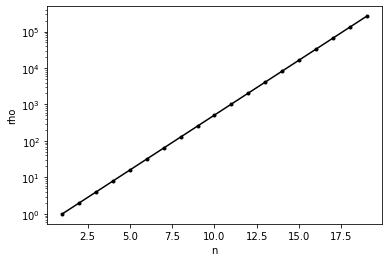

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
nvals = 1+np.arange(19)
rho_vals = np.zeros_like(nvals,dtype=np.float64)
for i,n in enumerate(nvals):
    P,L,U = lu(matrix_with_large_rho(n))
    rho_vals[i] = np.max(np.abs(U))
plt.semilogy(nvals,rho_vals,'k.-')
plt.xlabel('n')
plt.ylabel('rho')

The growth factor $\rho$ grows exponentially with $n$ for this matrix. What is the effect on the backward error for solving a linear system of equations?

In [6]:
n = 100
A = matrix_with_large_rho(n)
b = np.random.rand(n)
x = np.linalg.solve(A,b)
print(np.linalg.norm(np.dot(A,x)-b)/(np.linalg.norm(A)*np.linalg.norm(x) + np.linalg.norm(b)))

0.022670564761240297


In [7]:
np.linalg.cond(A)

44.80225124630292

Hence, the backward error is huge even though the matrix has a very small condition number. It follows that **LU decomposition is not backward stable for all matrices.**

## Growth factor of random matrices

While we have shown an example, where the growth factor grows exponentially, in practice this does not seem to be of relevance. This is a puzzle that still concerns researchers in Numerical Linear Algebra. A beautiful study on this topic was performed by Driscoll and Maki in 2007 who numerically computed the probability density functions for certain types of random matrices to have large growth factors.

The following plot shows the probability density functions for the growth factor $\rho$ for matrices of dimension $8$, $16$, and $32$ (see [Driscoll, Maki '07](http://www.math.udel.edu/~driscoll/papers/2007-DriscollMaki-673.pdf)). It shows that large growth factors are exponentially unlikely to occur randomly. Indeed, essentially no practical application is known, where growth factors cause difficulties. Hence, **in practice Gaussian elimination with column pivoting is backward stable**.

![Growth factors](growth_factors.png)